In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import warnings
warnings.filterwarnings('ignore')

# COVID-19 Cases in the United States
 - The previous notebook looked at Google Trends Data in just 2020 and over the past five years. The intent of that data exploration was to set the stage for the possibility that an increase in recipe searches corresponded with COVID-19. However, when we looked back across the past five years, it appears that there are always surges and declines in interest for these search trends. Nevertheless, I wanted to continue with my initial idea and look at COVID-19 positive case data to see if there is any correlation between number of cases and interest in healthy baking and cooking. Any correlation should be taken with a grain of salt as interest in being healthy peaks and dips in any year– not just during a pandemic.
 - The source of this data is from the New York Times (https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html)
 - Google Trends inputs data on a weekly basis and the COVID-19 case csv was on a daily basis, so I had to use code to put it to scale. 


In [24]:
baking_df = pd.read_csv('../data/HealthyBaking.csv', skiprows=1, index_col=0)
cooking_df = pd.read_csv('../data/HealthyRecipe.csv', skiprows=1, index_col=0)
cases_df = pd.read_csv('../data/us_covidcases.csv', index_col=0, parse_dates = True)

In [11]:
combined_df=pd.merge(baking_df, cooking_df, left_index=True, right_index=True)
combined_df.head()

,healthy baking: (United States),healthy recipe: (United States)
Week,,
2019-10-20,51,60
2019-10-27,29,58
2019-11-03,57,59
2019-11-10,25,63
2019-11-17,56,58


In [12]:
cases_df.shape

(275, 18)

This data sets has 275 rows and 18 columns; however, only one column is going to be relevant for this project– poisitiveIncrease. It is notable that there are many more rows in this data set than the Google Trends Data because these statistics are recorded on a daily basis, while Google Trends recorded statistics on a weekly basis

In [13]:
cases_df.head()

,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,posNeg,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,
2020-10-22,214845.0,1173,23018.0,8086.0,2706,41010.0,443777.0,111569861,923136,2641.0,2147.0,0,8366221,76560,3353056.0,56,128964596,1139419
2020-10-21,213672.0,994,22822.0,8182.0,2104,40271.0,441071.0,110646725,682149,2622.0,1920.0,0,8289661,57294,3323354.0,56,127825177,870363
2020-10-20,212678.0,832,22662.0,8178.0,2150,39230.0,438967.0,109964576,757254,2593.0,1889.0,0,8232367,60664,3295426.0,56,126954814,909386
2020-10-19,211846.0,456,22475.0,7997.0,1684,37826.0,436817.0,109207322,1025339,2577.0,1800.0,0,8171703,57148,3272603.0,56,126045428,1203168
2020-10-18,211390.0,393,22391.0,7292.0,853,36437.0,435133.0,108181983,770454,2557.0,1762.0,0,8114555,48922,3234183.0,56,124842260,982434


This project is only concerned with the "positiveIncrease" column

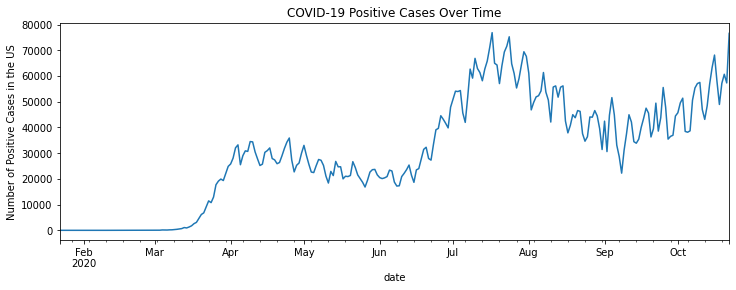

In [25]:
cases_df['positiveIncrease'].plot(figsize=(12,4))
plt.ylabel('Number of Positive Cases in the US')
plt.title('COVID-19 Positive Cases Over Time');

This data is using the "Positive Increase" columns which tells us how many total new cases there are every day. The maximum amount of new positive cases in a given day is about 80000. 
Unfortunately, we know this graph is accurate: cases have been spiking in waves. Again, it is notable that this is on a daily basis. If we want to make comparisons with the previous data sets then we need to convert it to a weekly basis. See below: 

In [26]:
cases_month_df = cases_df['positiveIncrease'].resample("7D",offset='4D').mean().to_frame()

**It is important to see the index of this data because we shifted the date to align with the Google Trends dates 

In [17]:
combined2_df = pd.merge(combined_df, cases_month_df, left_index=True, right_index=True)

In [18]:
combined2_df.head()

,healthy baking: (United States),healthy recipe: (United States),positiveIncrease
2020-01-19,45,76,0.0
2020-01-26,33,77,0.0
2020-02-02,41,68,0.0
2020-02-09,41,67,0.0
2020-02-16,51,70,0.0


This shows the three sets of data: two Google Search trends and positive cases. Right now, the Google Trends outputs are relative popularity while the positive increase column is an absolute number of cases. We want to adjust the scale for Positive Increase so the scale fits all three data sets the same. Therefore, we need to convert all the values on the y-axis to be relative values. 

In [19]:
combined2_df['positiveIncrease_rank']=combined2_df['positiveIncrease']/combined2_df['positiveIncrease'].max()*100

In [20]:
combined2_df.head()

,healthy baking: (United States),healthy recipe: (United States),positiveIncrease,positiveIncrease_rank
2020-01-19,45,76,0.0,0.0
2020-01-26,33,77,0.0,0.0
2020-02-02,41,68,0.0,0.0
2020-02-09,41,67,0.0,0.0
2020-02-16,51,70,0.0,0.0


Text(0.5, 1.0, 'A Relative Look at Interest in Healthy Recipe and COVID-19')

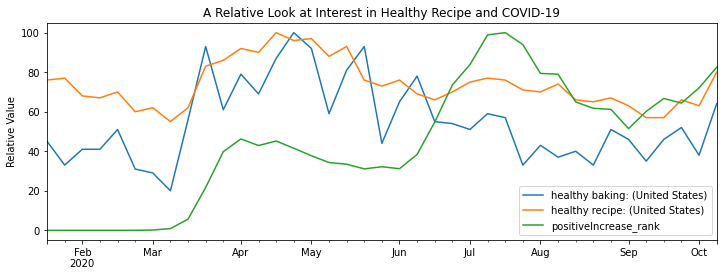

In [28]:
cols_to_plot = ['healthy baking: (United States)', 'healthy recipe: (United States)', 'positiveIncrease_rank']
combined2_df[cols_to_plot].plot(figsize=(12,4))
plt.ylabel('Relative Value')
plt.title('A Relative Look at Interest in Healthy Recipe and COVID-19')

This graph is difficult to interpret as there is a lot in one graph. As a reminder, a relative Y-axis means that a value of 100 means the data is the highest it has reaches, while a value of 50 means half as high as the peak. The green lines represents positive cases, the blue lines represents the search term "Healthy Baking Recipe" and the orange line represents the search term "Healthy Cooking Recipe".

If we look at July, it is clear that the number of positive cases is not the driving force for baking and recipe search trends. 

My qualitative analysis would be that that the initial climb of positive cases in early March made everyone panic, stay inside and cook. This is why we see all three lines sharply increase around the same time in March. However, positive cases eventually leveled off and recipes remained a popular search term. I am assuming that this is when people were in quarantine. So while cases might not have been climbing, the need and desire to cook was still at its peak. Finally, around June or July people were getting quarantine "fatigue" and no longer felt confined to their home. As a result, they may have stopped searching for recipes. Unfortunately, when quarantine fatigue set in, cases started to climb again. 

In [22]:
combined2_df.corr()

,healthy baking: (United States),healthy recipe: (United States),positiveIncrease,positiveIncrease_rank
healthy baking: (United States),1.000000,0.772962,0.035350,0.035350
healthy recipe: (United States),0.772962,1.000000,0.043191,0.043191
positiveIncrease,0.035350,0.043191,1.000000,1.000000
positiveIncrease_rank,0.035350,0.043191,1.000000,1.000000


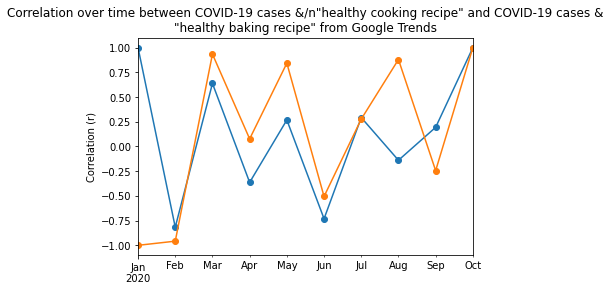

In [29]:
monthly_corr1=combined2_df.resample('M')[['positiveIncrease_rank','healthy baking: (United States)','healthy recipe: (United States)']].corr().groupby(level=0).first()
monthly_corr1['healthy baking: (United States)'].plot(style='-o')
monthly_corr1['healthy recipe: (United States)'].plot(style='-o')
plt.ylabel('Correlation (r)')
plt.title('Correlation over time between COVID-19 cases &/n"healthy cooking recipe" and COVID-19 cases &\n"healthy baking recipe" from Google Trends');

This graph shows the correlation between positive cases and baking searches (blue line) and positive cases and healthy recipe searches (orange line). 

Looking at the orange line it appears that there is an almost perfect correlation of 1 between healthy baking recipe searches and positive cases in March, May and August. The blue line shows a somewhat positive correlation between healthy cooking searches and positive cases in January, March and October. I think it's worth noting there is also a perfect correlation between healthy cooking searches and case data in January before the virus existed. This means that healthy cooking recipe searches were at their lowest before the virus started. I point this out because it is easy to get excited about a positive correlation and assume that it means as one variable increases the other increases. However, that is clearly not the case: a perfect correlation can exist when both variables decrease as well. Therefore, this positive correlations do not mean much. Going forward with my data story, I am not going to correlate an increase in cases to increased engagement with healthy recipes. 